In [44]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

In [45]:
train_df = pd.read_csv("PCA_corr_train.csv")
test_df = pd.read_csv("PCA_corr_test.csv")
ind = test_df['Unnamed: 0']
train_df.drop('Unnamed: 0',inplace=True,axis = 1)
test_df.drop('Unnamed: 0',inplace=True,axis = 1)

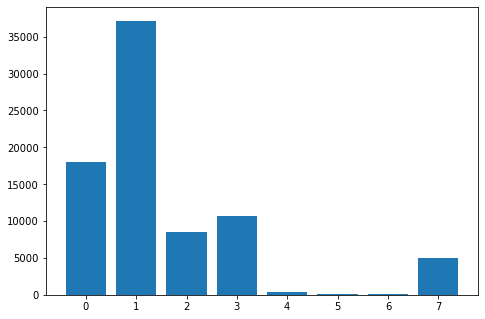

In [59]:
bar_df = train_df.groupby('label').size().to_frame('Count of entries').reset_index()

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = bar_df['label']
students = bar_df['Count of entries']
ax.bar(langs,students)
plt.show()

In [24]:
test_df.shape

(34365, 30)

In [13]:
# train_df.drop('org',axis = 1, inplace=True)
# test_df.drop('org', axis = 1, inplace=True)
# train_df.columns

In [14]:
y = pd.get_dummies(train_df.label)
X_train, X_test, y_train, y_test = train_test_split(
    train_df.drop('label',axis=1), y, test_size=0.1, random_state=42)

In [15]:

import pandas 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [19]:
model = Sequential()
model.add(Dense(74, input_shape=(30,), activation='relu'))
# model.add(Dense(64, activation='tanh'))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [21]:
model.fit(X_train,y_train, epochs=5, batch_size=10)

Epoch 1/5
7216/7216 [==============================] - 11s 1ms/step - loss: 0.1929 - accuracy: 0.5694
Epoch 2/5
7216/7216 [==============================] - 9s 1ms/step - loss: 0.1815 - accuracy: 0.5853
Epoch 3/5
7216/7216 [==============================] - 9s 1ms/step - loss: 0.1788 - accuracy: 0.5901
Epoch 4/5
7216/7216 [==============================] - 9s 1ms/step - loss: 0.1770 - accuracy: 0.5913
Epoch 5/5
7216/7216 [==============================] - 9s 1ms/step - loss: 0.1757 - accuracy: 0.5923


In [28]:
_,accuracy = model.evaluate(X_train,y_train, verbose=0)

In [29]:
accuracy

0.5986446142196655

In [43]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,-1.018022,0.936641,0.950131,-2.293522,0.716231,-0.461038,1.054606,-0.432531,0.628936,2.020711,...,-0.529239,-0.267191,0.186523,0.209966,-0.269898,-0.005480,0.062970,0.648352,-0.033703,2
1,0.227193,0.543762,1.027168,-2.107249,0.227555,-0.888224,2.051071,1.438475,-1.226683,1.481969,...,0.397926,0.463273,-0.492525,0.275018,0.544521,0.307931,0.066937,-0.105225,-0.294814,1
2,1.634946,-3.730669,0.505271,2.956570,-0.638506,-0.210923,-2.147357,-1.250238,0.543883,1.447944,...,-0.240638,-0.124604,0.160141,0.125815,-0.012827,-0.110774,0.089146,0.000503,-0.190936,1
3,-0.988806,-0.419754,-1.085061,-2.569832,-2.211534,-0.103916,-1.026140,0.263647,-1.618007,-0.348746,...,-0.090934,0.190413,-0.424913,-0.508656,-0.387231,-0.275089,0.148934,0.197137,-0.324294,1
4,1.009709,0.603232,2.437676,-1.939679,1.264952,-0.735523,2.190796,-2.407144,-0.156700,-0.956039,...,-0.465520,-0.023734,-0.040526,0.285133,-0.069850,-0.224150,-0.256571,0.562328,-0.133672,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80171,2.681787,1.292852,-0.459068,-0.264026,2.788655,-0.558109,2.431865,-0.736217,0.391680,-3.717483,...,0.105523,-0.069273,-0.346557,0.055969,-0.371641,-0.008562,-0.156422,0.173073,0.132835,3
80172,1.677558,-3.643023,0.531950,-2.302082,-0.489809,0.067808,-2.421857,-1.137625,0.329265,1.265119,...,-0.127915,-0.083379,-0.078879,-0.061858,0.258711,0.256306,0.089955,-0.546427,-0.096775,0
80173,3.558495,1.314608,0.396639,0.440884,1.635652,-0.562073,1.364121,-0.009412,0.936524,-1.690622,...,0.231100,-0.288147,0.336665,-0.432738,-0.175409,-0.340880,-0.174296,-0.007130,0.267083,0
80174,1.563489,1.790441,2.466717,-1.923521,-0.699983,-0.810108,-0.456073,0.912760,-1.833289,0.029802,...,-0.597521,0.811177,0.502456,-0.226471,0.065526,0.254138,-0.425189,-0.077353,0.278217,0


In [27]:
a = model.predict(test_df)
df_final = pd.DataFrame(a).idxmax(axis=1)
# df_final.shape
# df_final['ID'] = ind

# df_final.head()
df_final.to_csv('Submission/submission_8.csv')

1074/1074 [==============================] - 1s 1ms/step


In [112]:
print(train_df.shape)
print(test_df.shape)

for x in train_df.columns:
    if x not in test_df.columns:
        print(x)

(80174, 75)
(34365, 73)
label
mail_type_calendar
tld_back_my
tld_back_int
tld_back_sa
tld_back_au
tld_back_jp
tld_back_io
